In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

## Tutorials
List of some online tutorials but feel free to google, or ask ai:
 * `numpy`: https://www.w3schools.com/python/numpy/default.asp
 * `matplotlib`: https://www.w3schools.com/python/matplotlib_intro.asp
 * `networkx`: https://networkx.org/documentation/stable/tutorial.html

In [3]:
G5 = nx.Graph()
G5.add_edge("T","S")
G5.add_edge("P","S")
G5.add_edge("R","S")
G5.add_edge("Q","P")
G5.add_edge("Q","R")

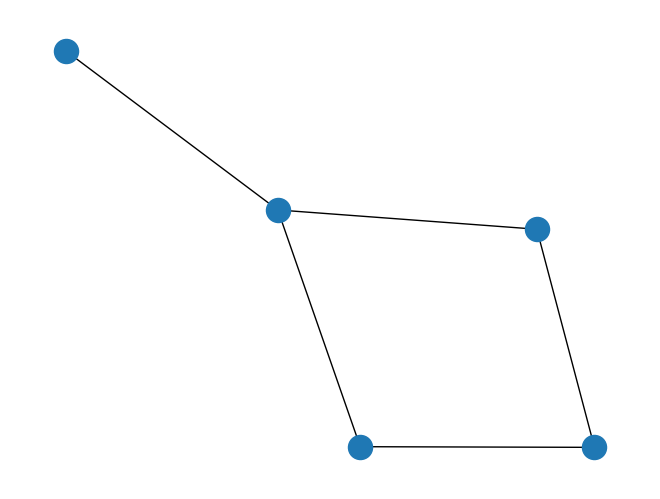

In [4]:
nx.draw(G5)

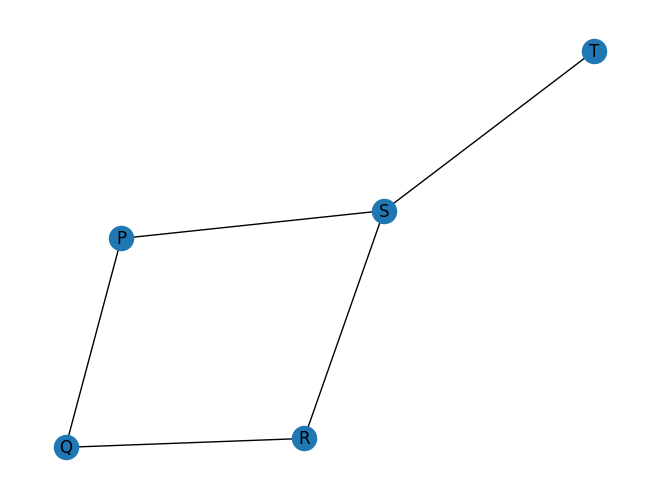

In [5]:
nx.draw(G5,with_labels=True)

In [6]:
G5.nodes()

NodeView(('T', 'S', 'P', 'R', 'Q'))

In [7]:
G5.edges()

EdgeView([('T', 'S'), ('S', 'P'), ('S', 'R'), ('P', 'Q'), ('R', 'Q')])

In [8]:
G5.degree()

DegreeView({'T': 1, 'S': 3, 'P': 2, 'R': 2, 'Q': 2})

In [9]:
list(dict(G5.degree()).values())

[1, 3, 2, 2, 2]

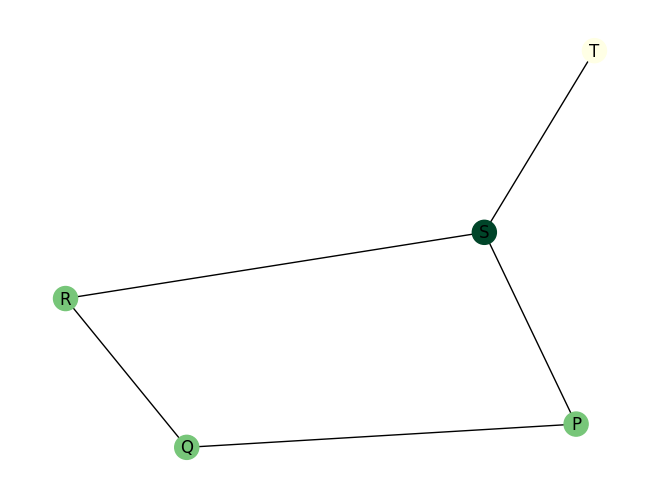

In [10]:
pos = nx.spring_layout(G5)
nx.draw(G5,pos = pos,with_labels=True,node_color=list(dict(G5.degree()).values()),cmap=plt.cm.YlGn)

In [11]:
print(pos)

{'T': array([0.35156497, 1.        ]), 'S': array([0.16983662, 0.24284046]), 'P': array([ 0.32127064, -0.55637782]), 'R': array([-0.5213519 , -0.03315492]), 'Q': array([-0.32132033, -0.65330773])}


In [12]:
A5 = nx.adjacency_matrix(G5).todense()
print(A5)

[[0 1 0 0 0]
 [1 0 1 1 0]
 [0 1 0 0 1]
 [0 1 0 0 1]
 [0 0 1 1 0]]


In [13]:
A8 = np.zeros((6,6),dtype=int)
A8

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [14]:
A8[0,1] = 1
A8[0,5] = 1
A8[2,1] = 1
A8[2,5] = 1
A8[3,0] = 1
A8[4,3] = 1
A8[5,3] = 1
A8[5,4] = 1
A8

array([[0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 1, 0]])

In [15]:
G8 = nx.from_numpy_array(A8)
G8 = nx.relabel_nodes(G8, lambda x: x+1)

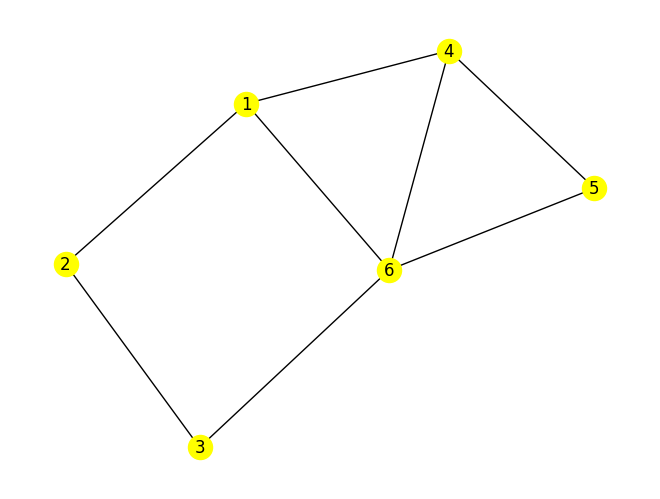

In [16]:
nx.draw(G8,with_labels=True,node_color='yellow')

In [17]:
G8 = nx.from_numpy_array(A8,create_using=nx.DiGraph)
G8 = nx.relabel_nodes(G8, lambda x: x+1)

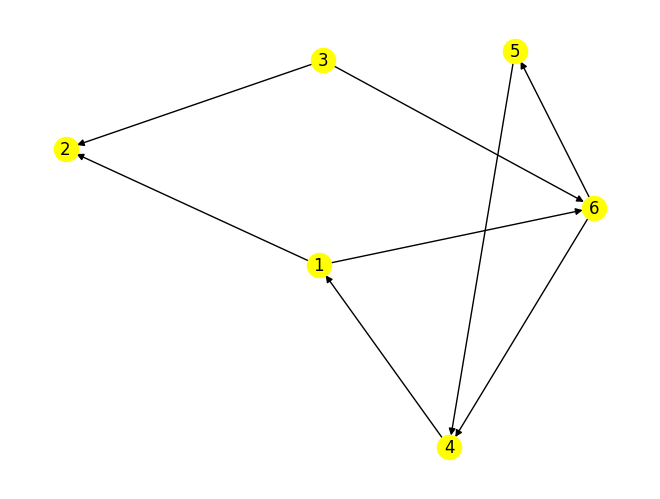

In [18]:
nx.draw(G8,with_labels=True,node_color='yellow')

In [19]:
nx.write_edgelist(G8,'G8.csv', data=False)

In [20]:
nx.write_gexf(
G8,
"G8.gexf",
encoding='utf-8',
prettyprint=True)

In [21]:
G7 = nx.Graph()
G7.add_edge("X","Y")
G7.add_edge("X","W")
G7.add_edge("X","Z")
G7.add_edge("Z","Z")

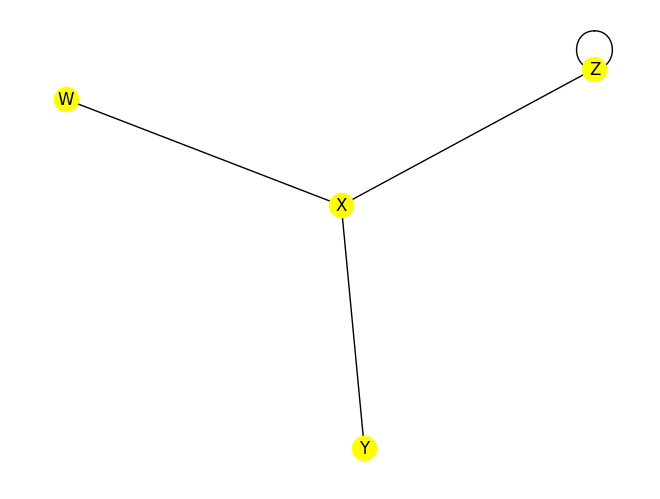

In [22]:
nx.draw(G7,with_labels=True,node_color='yellow')

In [23]:
A7 = nx.adjacency_matrix(G7).todense()
print(A7)

[[0 1 1 1]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 1]]


In [24]:
np.dot(A7,A7).dot(A7)

array([[1, 3, 3, 4],
       [3, 0, 0, 1],
       [3, 0, 0, 1],
       [4, 1, 1, 3]])

In [25]:
nx.write_gexf(
G7,
"G7.gexf",
encoding='utf-8',
prettyprint=True)

In [26]:
G4 = nx.Graph()
G4.add_edge(0,1)
G4.add_edge(2,1)
G4.add_edge(3,4)
G4.add_edge(5,4)

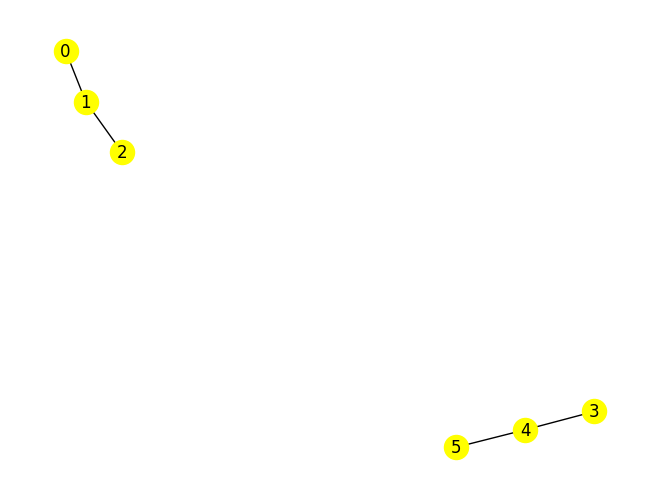

In [27]:
nx.draw(G4,with_labels=True,node_color='yellow')

In [28]:
for cc in nx.connected_components(G4):
    print(cc)

{0, 1, 2}
{3, 4, 5}


In [29]:
N = 10
L = 20
G = nx.Graph()
for i in range(L):
    i1, i2 = np.random.choice(range(N),2,replace=False)
    G.add_edge(i1,i2)

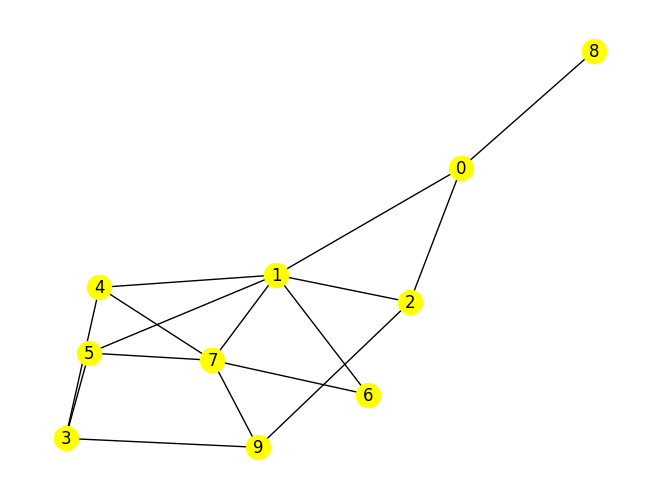

In [30]:
nx.draw(G,with_labels=True,node_color='yellow')

In [31]:
G.degree()

DegreeView({np.int64(6): 2, np.int64(7): 5, np.int64(4): 3, np.int64(1): 6, np.int64(5): 3, np.int64(9): 3, np.int64(2): 3, np.int64(3): 3, np.int64(8): 1, np.int64(0): 3})

In [32]:
degs = list(dict(G.degree()).values())

(array([1., 0., 1., 0., 6., 0., 0., 0., 1., 1.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 10 artists>)

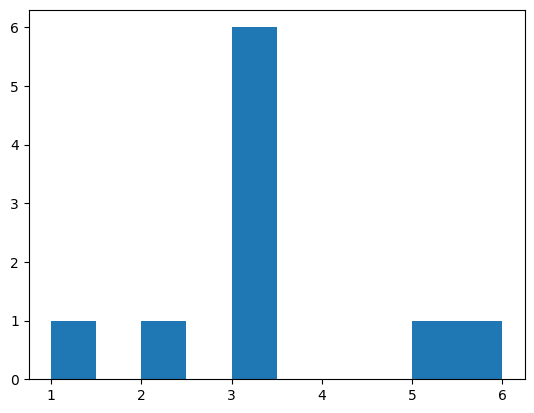

In [33]:
plt.hist(degs)

In [34]:
#for reference the numpy function making histograms, or use the Counter function
bins = np.arange(5)+0.5
h, bins = np.histogram(degs,bins=bins)
print(h,bins)

[1 1 6 0] [0.5 1.5 2.5 3.5 4.5]


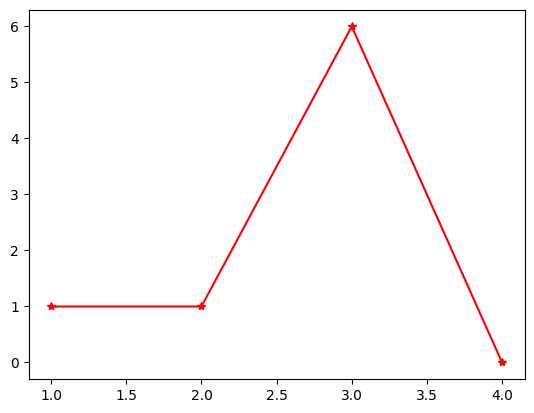

In [35]:
plt.plot((bins[:-1]+bins[1:])/2,h,"r*-")

In [36]:
from collections import Counter
Counter(degs)

Counter({3: 6, 2: 1, 5: 1, 6: 1, 1: 1})

## Average
The results are very random, and changes from realization to realization. Let us do ensemble average, namely independent samples.

In [37]:
nsamples = 10000
N = 10
L = 5
degs = []
for _ in range(nsamples):
  G = nx.Graph()
  for i in range(L):
      i1, i2 = np.random.choice(range(N),2,replace=False)
      G.add_edge(i1,i2)
  degs = degs + list(dict(G.degree()).values())

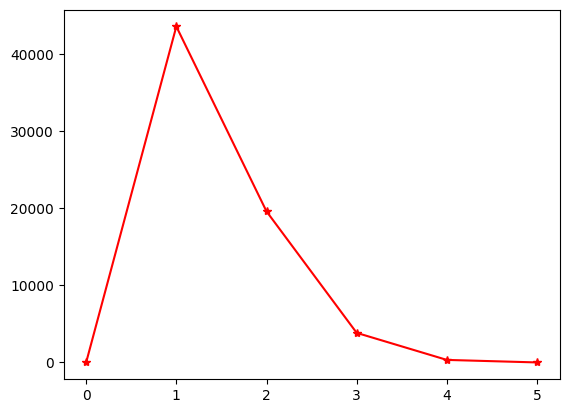

In [38]:
c = dict(Counter(degs))
h = np.zeros(max(c.keys())+1,dtype=int)
for i in c.keys():
  h[i] = c[i]
plt.plot(np.arange(len(h)),h,"r*-")

## Exercises

 1. Create the following graphs and plot them:
   * Fully connected graph
   * Start graph
   * A random tree graph
   * Square lattice with periodic boundary conditions
   * Triangular lattice (1d) with periodic boundary conditions
 2. Zachary's Karate club
   * Load and plot the graph, use the AI
   * How many nodes do you have to remove to cut the graph into two?


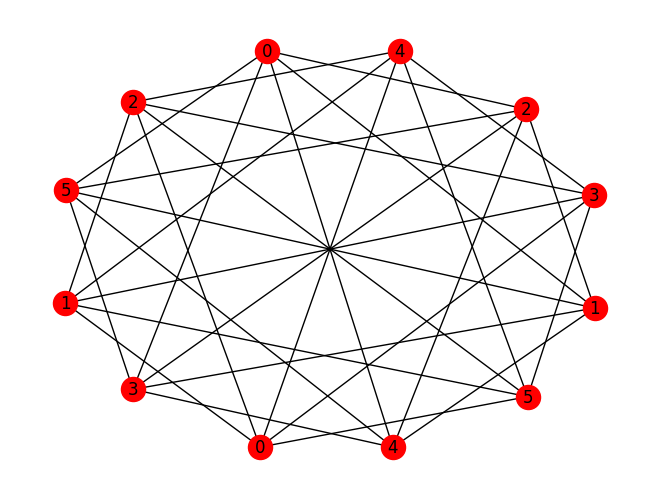

In [39]:
# Method 1: Using nx.complete_graph()
fully_connected = nx.complete_graph(6)
nx.draw(fully_connected, with_labels=True, node_color='red')

# Method 2: Manual construction
def create_fully_connected(n):
    G = nx.Graph()
    # Add all possible edges between every pair of nodes
    for i in range(n):
        for j in range(i+1, n):  # Avoid self-loops and duplicate edges
            G.add_edge(i, j)
    return G

# Example: 6-node fully connected graph
manual_fully_connected = create_fully_connected(6)
nx.draw(manual_fully_connected, with_labels=True, node_color='red')

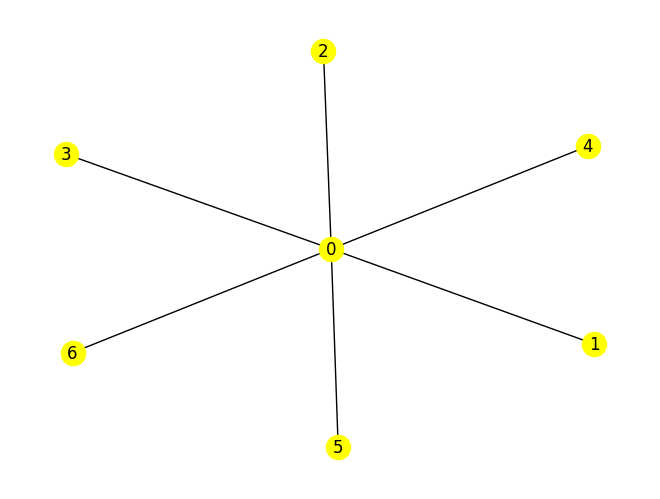

In [40]:
# start graph
star_graph = nx.Graph()
star_graph.add_edge(0,1)
star_graph.add_edge(0,2)
star_graph.add_edge(0,3)
star_graph.add_edge(0,4)
star_graph.add_edge(0,5)
star_graph.add_edge(0,6)
nx.draw(star_graph,with_labels=True,node_color='yellow')


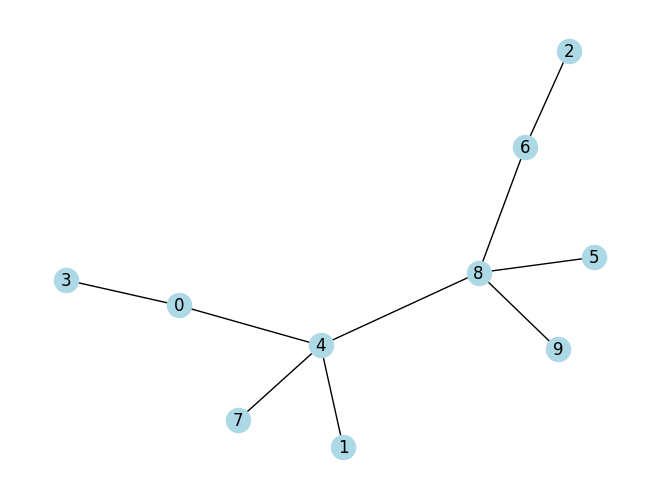

In [41]:
import random
#random.seed(42)

def create_random_tree(n):
    G = nx.Graph()
    nodes = list(range(n))
    # Start with first node
    connected = {nodes[0]}
    unconnected = set(nodes[1:])
    
    while unconnected:
        # Pick random connected node
        u = random.choice(list(connected))
        # Pick random unconnected node
        v = random.choice(list(unconnected))
        # Add edge
        G.add_edge(u, v)
        # Move v to connected set
        connected.add(v)
        unconnected.remove(v)
    
    return G

random_tree = create_random_tree(10)
nx.draw(random_tree, with_labels=True, node_color='lightblue')

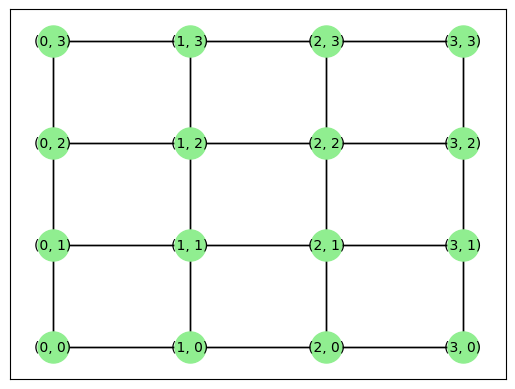

In [42]:
# Create the lattice
lattice = nx.grid_2d_graph(4, 4, periodic=True)

# Get the natural grid positions
pos = {node: node for node in lattice.nodes()}

# Draw with grid positioning
nx.draw_networkx(lattice, pos=pos, node_color='lightgreen', 
                 node_size=500, font_size=10)

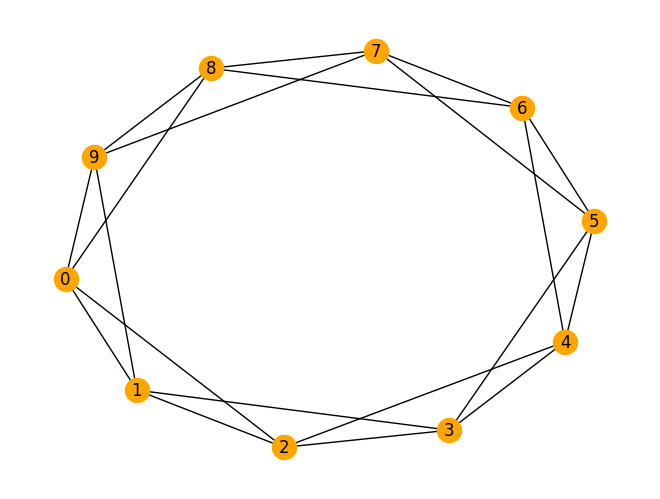

In [43]:
def create_1d_triangular_lattice(n):
    G = nx.Graph()
    
    # Add nodes
    for i in range(n):
        G.add_node(i)
    
    # Add edges: connect to neighbors at distance 1 and 2
    for i in range(n):
        # Distance 1 neighbors (with periodic boundary)
        G.add_edge(i, (i + 1) % n)
        G.add_edge(i, (i - 1) % n)
        
        # Distance 2 neighbors (with periodic boundary)
        G.add_edge(i, (i + 2) % n)
        G.add_edge(i, (i - 2) % n)
    
    return G

# Example: 8-node 1D triangular lattice
triangular_lattice = create_1d_triangular_lattice(10)
nx.draw(triangular_lattice, with_labels=True, node_color='orange')

Number of nodes: 34
Number of edges: 78
Average degree: 4.59


/var/folders/ly/ml1ytmcj1137w_s0w0f7j0g80000gn/T/ipykernel_15627/197954813.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


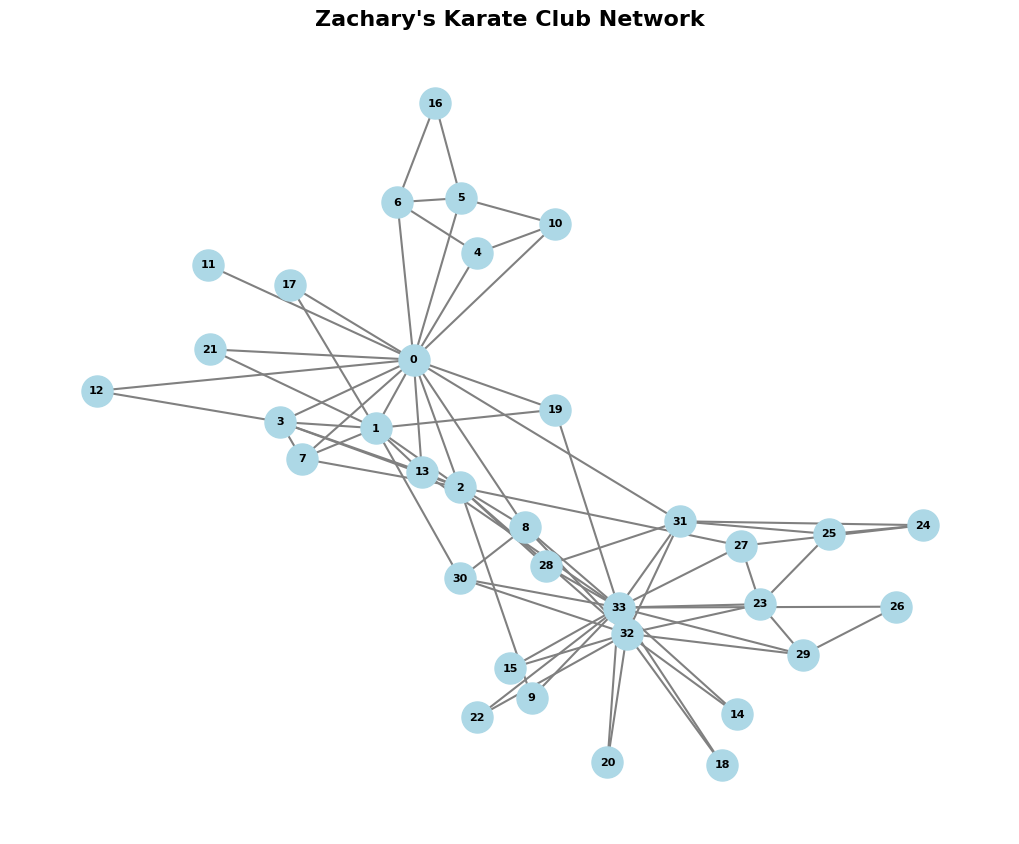


Network Properties:
Connected components: 1
Diameter: 5
Average clustering coefficient: 0.571


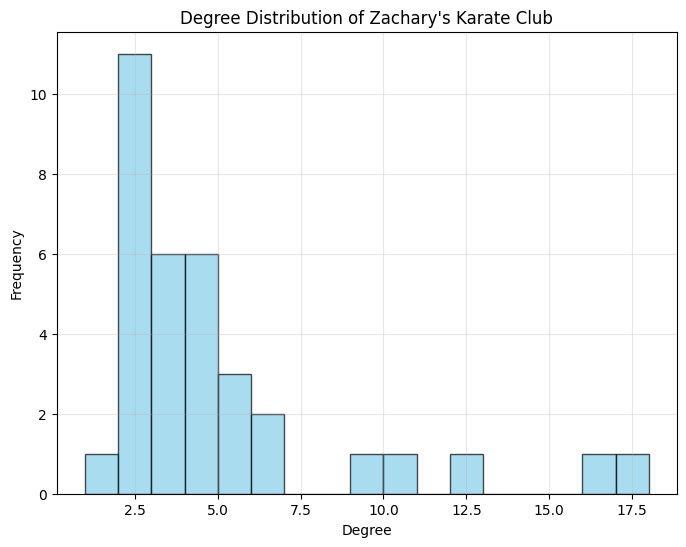

In [44]:
# Zachary's Karate Club
# Load the built-in Zachary's Karate Club network
G_karate = nx.karate_club_graph()

# Basic information about the network
print(f"Number of nodes: {G_karate.number_of_nodes()}")
print(f"Number of edges: {G_karate.number_of_edges()}")
print(f"Average degree: {sum(dict(G_karate.degree()).values()) / G_karate.number_of_nodes():.2f}")

# Plot the network
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G_karate, seed=42)  # Fixed seed for reproducible layout

# Draw the network
nx.draw(G_karate, pos, 
        with_labels=True, 
        node_color='lightblue',
        node_size=500,
        font_size=8,
        font_weight='bold',
        edge_color='gray',
        width=1.5)

plt.title("Zachary's Karate Club Network", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Show some network properties
print("\nNetwork Properties:")
print(f"Connected components: {nx.number_connected_components(G_karate)}")
print(f"Diameter: {nx.diameter(G_karate)}")
print(f"Average clustering coefficient: {nx.average_clustering(G_karate):.3f}")

# Degree distribution
degrees = [G_karate.degree(n) for n in G_karate.nodes()]
plt.figure(figsize=(8, 6))
plt.hist(degrees, bins=range(min(degrees), max(degrees) + 2, 1), 
         alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution of Zachary\'s Karate Club')
plt.grid(True, alpha=0.3)
plt.show()

From looking at the graph, its clear that removing the 0th node would split zack's graph in two.

Minimum number of nodes to remove to disconnect the graph: 1
Articulation points (nodes whose removal disconnects): [0]
Number of components after removing articulation points: 3
All minimum node cuts (size 1): [{0}]


/var/folders/ly/ml1ytmcj1137w_s0w0f7j0g80000gn/T/ipykernel_15627/1664882261.py:69: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


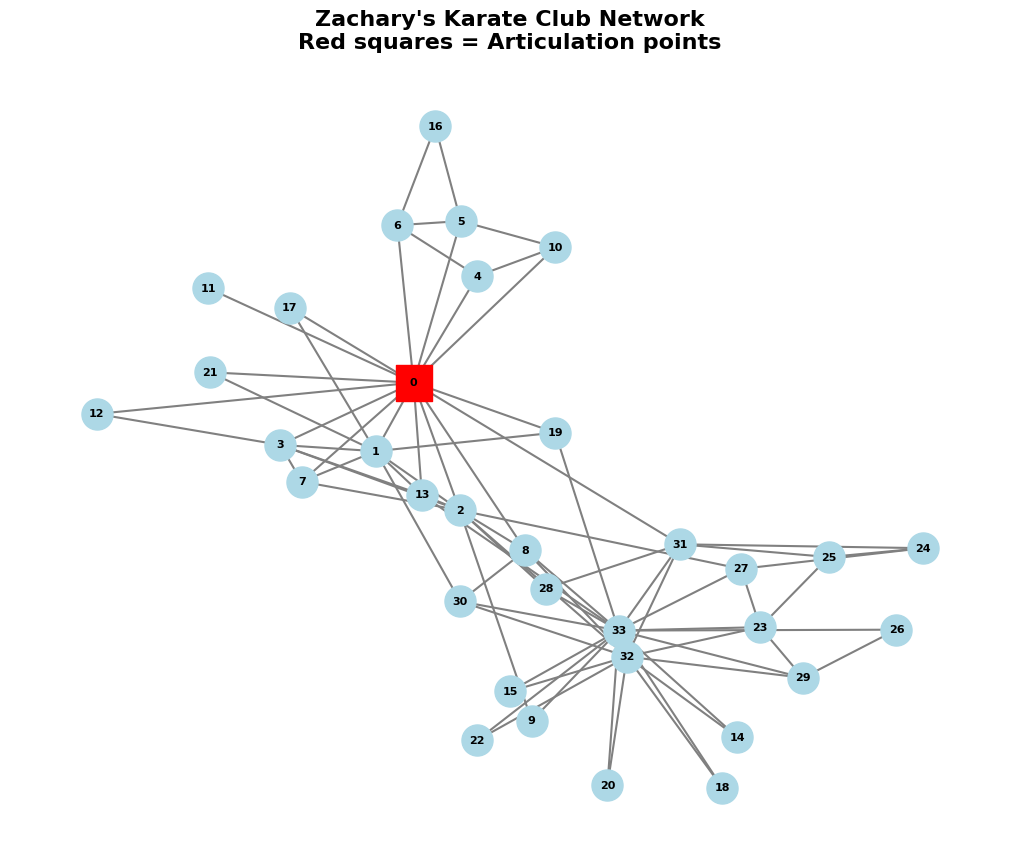

Is the graph 2-edge-connected? False
Minimum number of edges to remove to disconnect: 1


In [45]:
# Finding the minimum number of nodes to remove to disconnect the graph
from networkx.algorithms.connectivity import node_connectivity

# Method 1: Node connectivity (minimum number of nodes to remove to disconnect)
min_nodes_to_remove = node_connectivity(G_karate)
print(f"Minimum number of nodes to remove to disconnect the graph: {min_nodes_to_remove}")

# Method 2: Find articulation points using a different approach
# goes through each node and removes it, then checks if the graph is still connected
def find_articulation_points(G):
    """Find nodes whose removal disconnects the graph"""
    articulation_points = []
    original_components = nx.number_connected_components(G)
    
    for node in G.nodes():
        G_test = G.copy()
        G_test.remove_node(node)
        if nx.number_connected_components(G_test) > original_components:
            articulation_points.append(node)
    
    return articulation_points

articulation_points_list = find_articulation_points(G_karate)
print(f"Articulation points (nodes whose removal disconnects): {articulation_points_list}")

# Method 3: Check if removing specific nodes disconnects the graph
def test_node_removal(G, nodes_to_remove):
    """Test if removing specific nodes disconnects the graph"""
    G_test = G.copy()
    G_test.remove_nodes_from(nodes_to_remove)
    return nx.number_connected_components(G_test)

# Test removing the articulation points
if articulation_points_list:
    components_after_removal = test_node_removal(G_karate, articulation_points_list)
    print(f"Number of components after removing articulation points: {components_after_removal}")

# Method 4: Find all minimum node cuts (sets of nodes whose removal disconnects)
from networkx.algorithms.connectivity import all_node_cuts
try:
    min_cuts = list(all_node_cuts(G_karate))
    print(f"All minimum node cuts (size {min_nodes_to_remove}): {min_cuts}")
except:
    print("Could not find all minimum node cuts (graph might be too complex)")

# Visualize the articulation points
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G_karate, seed=42)

# Draw the network
nx.draw(G_karate, pos, 
        with_labels=True, 
        node_color='lightblue',
        node_size=500,
        font_size=8,
        font_weight='bold',
        edge_color='gray',
        width=1.5)

# Highlight articulation points
if articulation_points_list:
    nx.draw_networkx_nodes(G_karate, pos, 
                          nodelist=articulation_points_list,
                          node_color='red',
                          node_size=700,
                          node_shape='s')  # Square shape for articulation points

plt.title("Zachary's Karate Club Network\nRed squares = Articulation points", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Additional analysis: Check if the graph is 2-connected
is_2_connected = nx.is_k_edge_connected(G_karate, k=2)
print(f"Is the graph 2-edge-connected? {is_2_connected}")

# Check edge connectivity
from networkx.algorithms.connectivity import edge_connectivity
min_edges_to_remove = edge_connectivity(G_karate)
print(f"Minimum number of edges to remove to disconnect: {min_edges_to_remove}")

The cell above loops through each node, removes it temporarily, and counts the amount of disconnected components in the graph. If the number of disconnected components is higher than the original graph, the algorithm will consider the selected node an 'articulation point'. This way, the algorithm can determine if the graph can be broken into disconnected components by removing exactly one node (meaning the graph is not 2-edge-connected)